Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2, ceil

# Find the Root of the Function

Let's start by looking at a sample function and plotting it

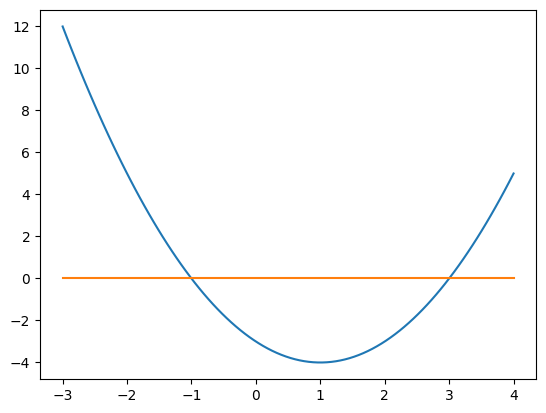

In [2]:
# original function
def f(x):
    return x**2 - 2*x - 3

# first derivative
def df(x):
    return 2*x - 2

# second derivative
def ddf(x):
    return 2

x = np.linspace(-3,4,100)

plt.plot(x,f(x))
plt.plot(x,np.zeros_like(x))
plt.show()

# Bisection Method

Bisection method algorithm

In [5]:
def bisection(func,dFunc,x0,x1,tol):
    #==================================================================
    # INPUTS
    # - func: function handle
    # - dfunc: derivative function handle
    # - x0: left bound
    # - x1: right bound
    # - tol: tolerance
    # OUTPUTS
    # - xNew: estimated root
    # - iterations
    # - errors
    #==================================================================

    print('*** BISECTION METHOD ***')

    i = 1
    iterations = []
    errors = []

    condition = True
    while condition:
        xNew = (x0 + x1) / 2
        
        if func(x0)*func(xNew) < 0:
            x1 = xNew
        else:
            x0 = xNew

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

*** BISECTION METHOD ***
Estimated root: -1.0000009536743164
Final error: 9.53674089032683e-07


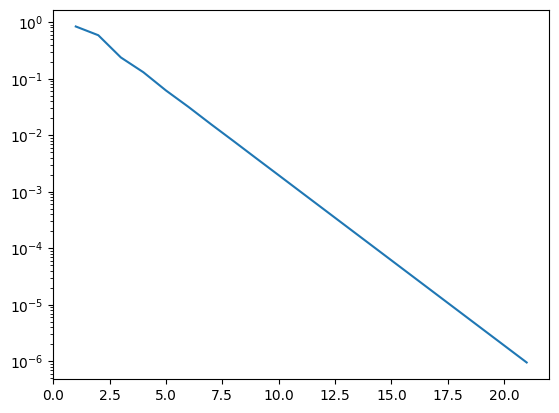

In [8]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, errors = bisection(f,df,x0,x1,tol)

print(f'Estimated root: {xNew}')
print(f'Final error: {errors[-1]}')
plt.semilogy(iterations,errors)
plt.show()

How many iterations will it take to converge?

In [5]:
def bisectionNumIterations():
    #==================================================================
    # INPUTS
    # -
    # OUTPUT
    # -
    #==================================================================
    return 0

Test the algorithm and plot it

# Secant Method

Secant method algorithm

In [9]:
def secant(func,dFunc,x0,x1,tol):
    #==================================================================
    # INPUTS
    # -
    # OUTPUTS
    # -
    #==================================================================

    print('*** SECANT METHOD ***')

    i = 1
    iterations = []
    errors = []

    condition = True
    while condition:
        if i > 5000:
            print('ERROR: not convergent within 5000 iterations')
            break
        
        if func(x1)-func(x0) == 0:
            print('ERROR: divide by zero')
            break

        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))
        x0 = x1
        x1 = xNew

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

Test the algorithm and plot it

*** SECANT METHOD ***
Estimated root: -0.9999999997671694
Final error: 2.328306436809747e-10


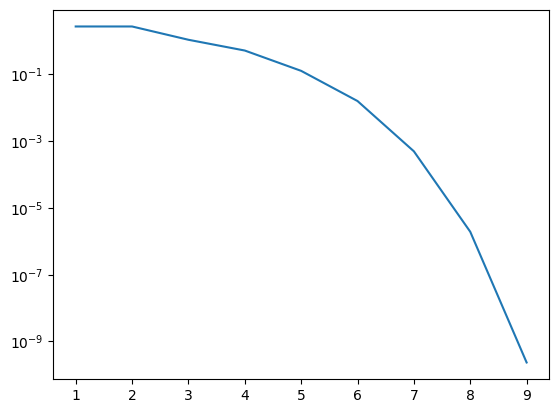

In [10]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, errors = secant(f,df,x0,x1,tol)

print(f'Estimated root: {xNew}')
print(f'Final error: {errors[-1]}')
plt.semilogy(iterations,errors)
plt.show()

# Regula-Falsi Method

Regula-Falsi method algorithm

In [11]:
def regula_falsi(func,dFunc,x0,x1,tol):
    #==================================================================
    # INPUTS
    # -
    # OUTPUTS
    # -
    #==================================================================

    print('*** REGULA-FALSI METHOD ***')
    
    i = 1
    iterations = []
    errors = []

    condition = True
    while condition:
        if i > 5000:
            print('ERROR: not convergent within 5000 iterations')
            break
        
        if func(x1)-func(x0) == 0:
            print('ERROR: divide by zero')
            break

        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))
        
        if func(x0)*func(xNew) < 0:
            x1 = xNew
        else:
            x0 = xNew

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

Test the algorithm and plot it

*** REGULA-FALSI METHOD ***
Estimated root: -0.999999046325911
Num iterations: 22
Final error: 9.536743164061416e-07


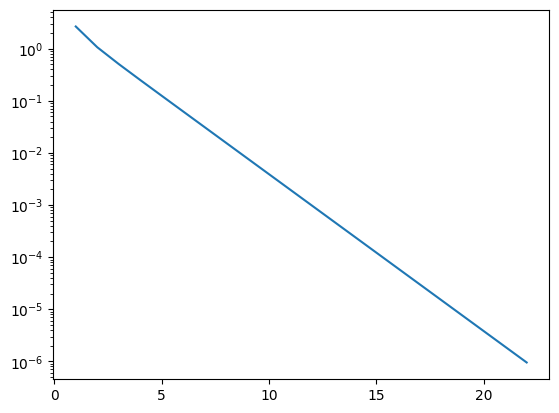

In [13]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, errors = regula_falsi(f,df,x0,x1,tol)

print(f'Estimated root: {xNew}')
print(f'Num iterations: {iterations[-1]}')
print(f'Final error: {errors[-1]}')
plt.semilogy(iterations,errors)
plt.show()

# Fixed Point Iterative Method

Define functions of the form `x = g(x)` and plot them

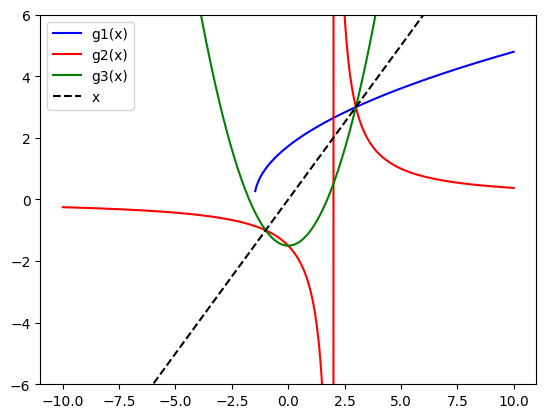

In [15]:
def g1(x):
    return np.sqrt(2*x + 3)

def g2(x):
    return 3 / (x-2)

def g3(x):
    return (x**2 - 3) / 2

x = np.linspace(-10,10,500)

plt.plot(x[x>=-3/2],g1(x[x>=-3/2]),'b',label='g1(x)')
plt.plot(x,g2(x),'r',label='g2(x)')
plt.plot(x,g3(x),'g',label='g3(x)')
plt.plot(x,x,'k--',label='x')
plt.ylim([-6,6])
plt.legend()
plt.show()

Range of convergence

In [9]:
def dg1(x):
    return 0

def dg2(x):
    return 0

def dg3(x):
    return 0

Fixed-point iterative algorithm

In [16]:
def fixed_point_iteration(func,dFunc,gFunc,x,tol):
    #==================================================================
    # INPUTS
    # - gFunc: function handle for g(x)
    # - x: initial guess
    # OUTPUTS
    # -
    #==================================================================

    print('*** FIXED POINT ITERATION METHOD ***')

    i = 1
    iterations = []
    errors = []

    condition = True
    while condition:
        if i > 5000:
            print('ERROR: not convergent within 5000 iterations')
            break

        xNew = gFunc(x)
        x = xNew

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

Test the algorithm and plot it

*** FIXED POINT ITERATION METHOD ***
ERROR: not convergent within 5000 iterations
Estimated root: -0.9799376866646595
Num iterations: 5000
Final error: 0.020163957043391516


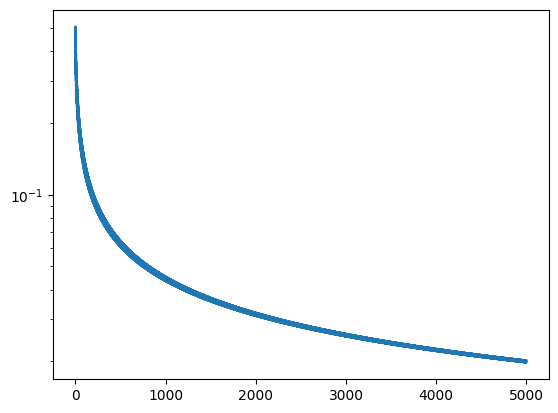

In [19]:
xGuess = -0.5
tol = 1e-6

xNew, iterations, errors = fixed_point_iteration(f,df,g3,xGuess,tol)

print(f'Estimated root: {xNew}')
print(f'Num iterations: {iterations[-1]}')
print(f'Final error: {errors[-1]}')
plt.semilogy(iterations,errors)
plt.show()

# Newton-Raphson Method

Newton-Raphson method algorithm

In [20]:
def newton_raphson(func,dFunc,x,tol):
    #==================================================================
    # INPUTS
    # -
    # OUTPUTS
    # -
    #==================================================================

    print('*** NEWTON-RAPHSON METHOD ***')

    i = 1
    iterations = []
    errors = []

    condition = True
    while condition:
        if i > 5000:
            print('ERROR: not convergent within 5000 iterations')
            break

        xNew = x - func(x)/dFunc(x)
        x = xNew

        epsX = abs(func(xNew) / dFunc(xNew))

        # log values
        iterations.append(i)
        errors.append(epsX)

        condition = epsX > tol
        i += 1

    return xNew, iterations, errors

Visualize fixed-point function

In [12]:
def g():
    return 0

Range of convergence

In [13]:
def dg():
    return 0

Test the algorithm and plot it

*** NEWTON-RAPHSON METHOD ***
Estimated root: -1.0000006938662227
Num iterations: 3
Final error: 6.938661023237843e-07


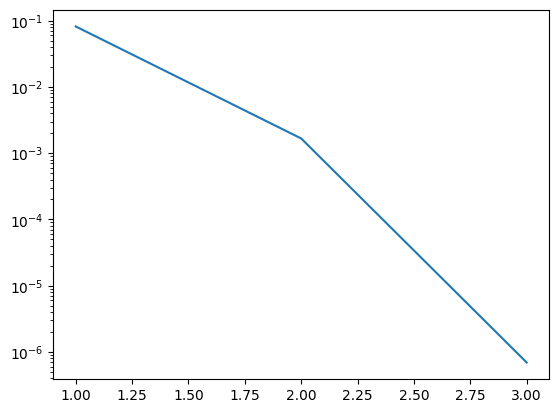

In [21]:
xGuess = -0.5
tol = 1e-6

xNew, iterations, errors = newton_raphson(f,df,xGuess,tol)

print(f'Estimated root: {xNew}')
print(f'Num iterations: {iterations[-1]}')
print(f'Final error: {errors[-1]}')
plt.semilogy(iterations,errors)
plt.show()

# Compare Methods

Compute the roots of the function with each method

Plot the convergence for all methods